# K Means Clustering Applications

In this notebook, I give you several basic applications of K Means Clustering algorithm (clustering in general)

In [1]:
%matplotlib notebook

from k_means import KMeans

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from skimage import io
import time

from sklearn.cluster import KMeans as KMeans_

## Simple Customer Segmentation

In [57]:
df = pd.read_csv('example_datasets/Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [58]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

<IPython.core.display.Javascript object>


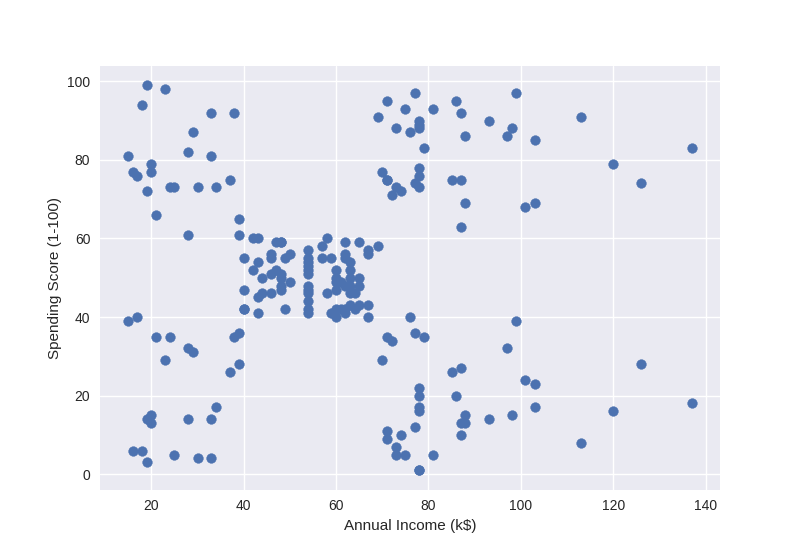

Text(0, 0.5, 'Spending Score (1-100)')

In [59]:
plt.close()
plt.style.use('seaborn')
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

In [60]:
model = KMeans(max_iter = 500, tolerance = 0.001, n_clusters = 5, runs = 100)
(clusters, data_with_clusters) = model.fit(X)

In [61]:
model.cost_

2602.972578838644

<IPython.core.display.Javascript object>


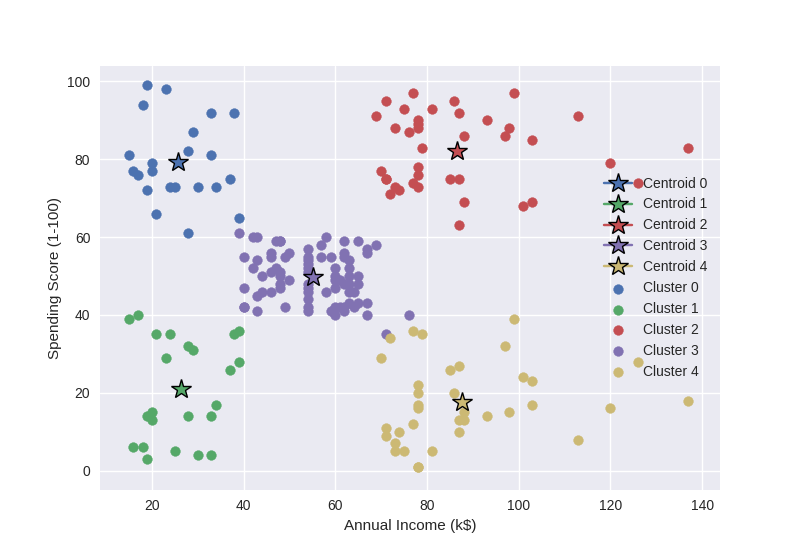

In [62]:
plt.close()
for i, cluster_mean in enumerate(clusters):
    data_cluster_i = data_with_clusters[ data_with_clusters[:, -1] == i ]
    plt.scatter(data_cluster_i[:, 0], data_cluster_i[:, 1], label = 'Cluster ' + str(i))
    plt.plot(cluster_mean[0], cluster_mean[1], label = 'Centroid ' + str(i), marker='*', markersize=15, markeredgecolor="k", markeredgewidth=1)
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.style.use('seaborn')
    plt.legend()

## Searching for optimum K by Elbow Method

In [63]:
def elbow_method(X, max_k = 10):
    costs = []
    for k in range(2, max_k):
        model = KMeans(n_clusters=k, init_method='var_part')
        model.fit(X)
        costs.append(model.cost_)
    plt.close()
    plt.plot(list(range(2, max_k)), costs)
    plt.xlabel("# of clusters (K)")
    plt.ylabel("Cost")

<IPython.core.display.Javascript object>


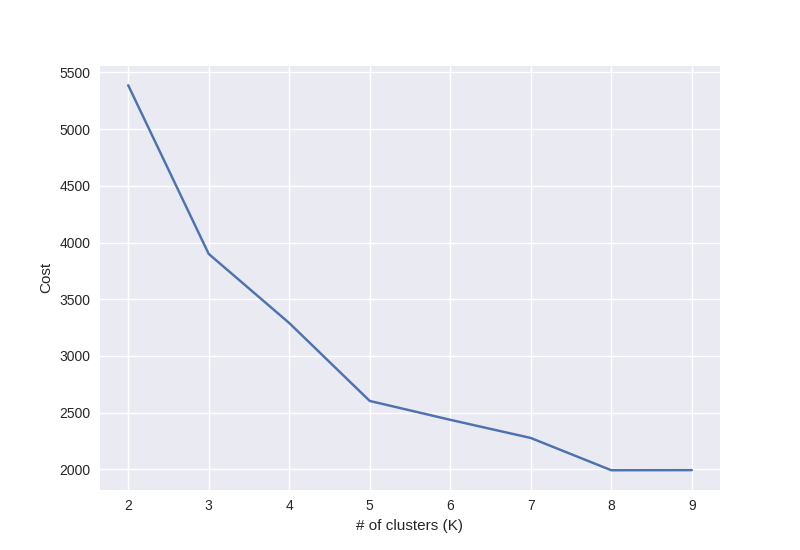

In [64]:
elbow_method(X)